# Обработка в пространственной и частотной областях

## Пространственная обработка изображений

Пространственные методы обработки изображений оперируют непосредственно пикселями изображений или их окрестностями.

Как правило, пространственные методы обработки меньше вычислительных ресурсов, чем трансформационные.

Пространственные методы делятся на две группы:

- яркостные преобразования;
- пространственная фильтрация.

Яркостные преобразования оперируют отдельными пикселями изображения, в то время как пространственная фильтрация — окрестностями пикселей.



### Ядра и свёртка

Для заданной матрицы $A$ и другой матрицы $w_{2a+1 \times 2b+1}$, называемой *ядром*, операция *свёртки* определяется следующим образом:

$$
[w * A]_{ij} = \sum_{s = -a}^a \sum_{t = -b}^b w_{st} A_{i-s, j-t}.
$$

Суммирование здесь ведётся только позиций $(i, j)$, позволяющих вместить окно ядра.

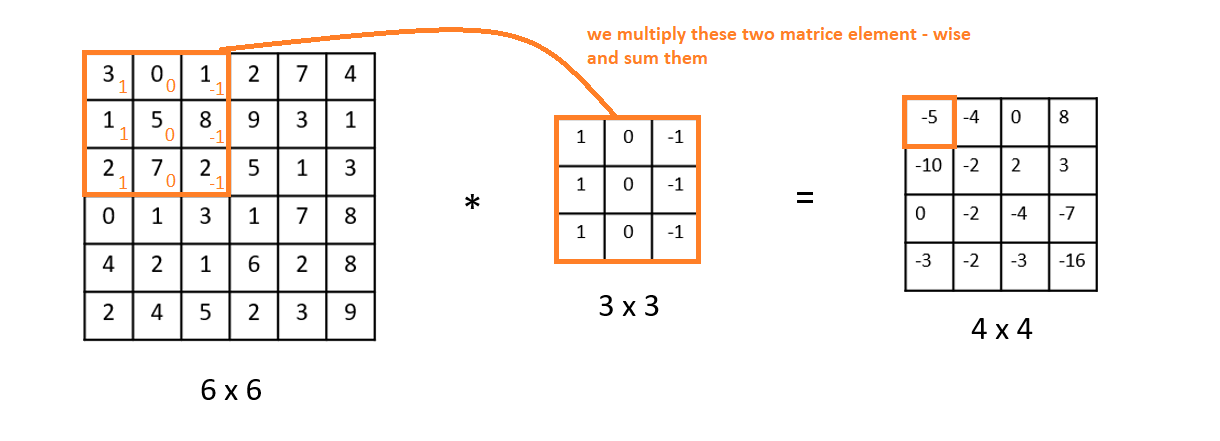

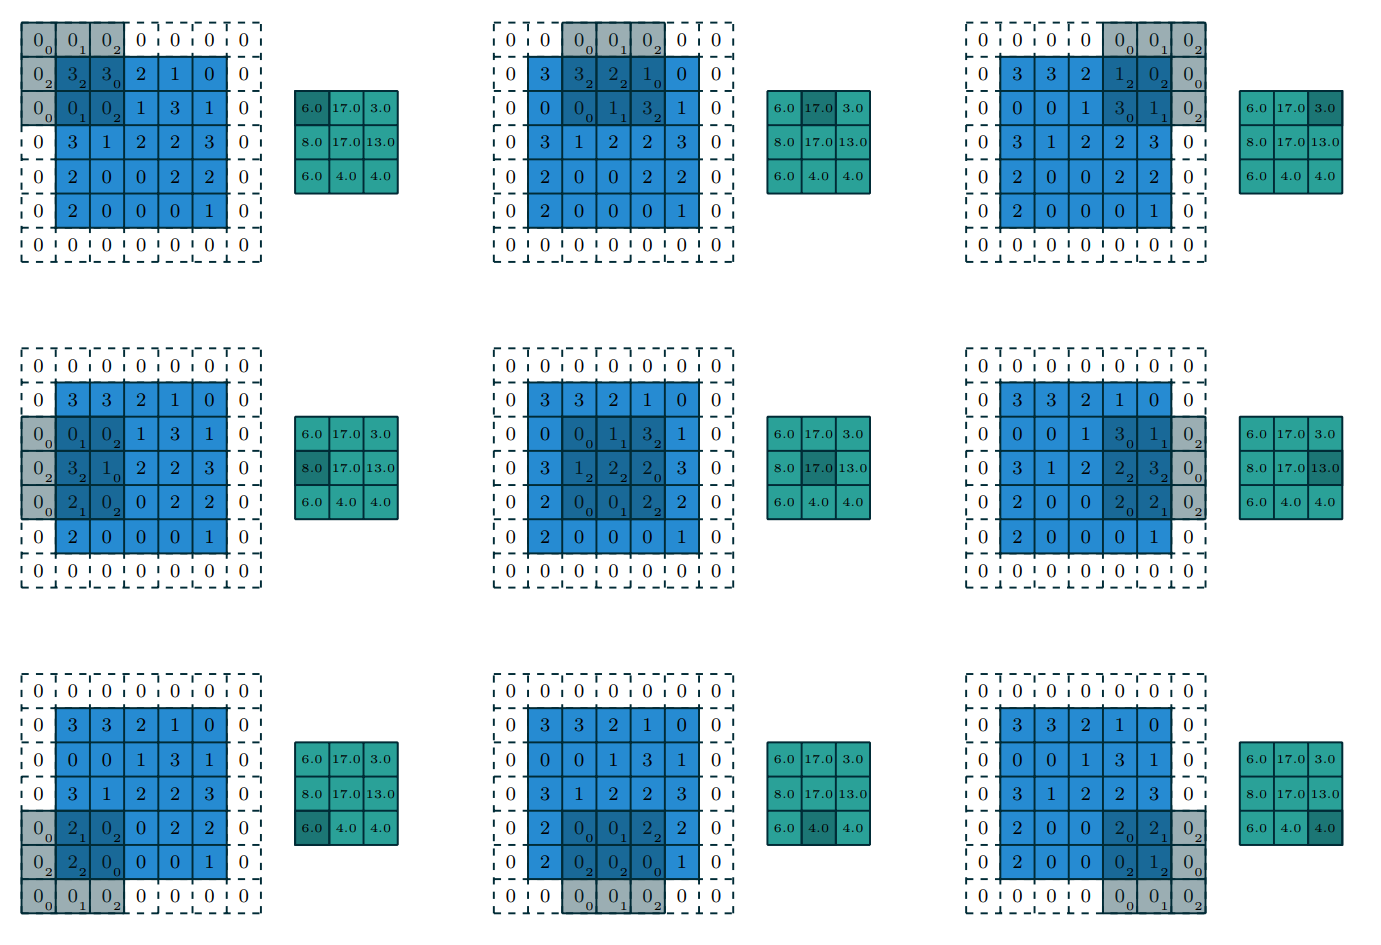

Ядро $w$ задаёт пространственный фильтр.

Рассмотрим два типа фильтров:

- сглаживающие пространственные фильтры;
- пространственные фильтры повышения резкости.

### Сглаживающие пространственные фильтры

#### Линейные сглаживающие фильтры

*Линейный сглаживающий фильтр* усредняет значения элементов окрестности, покрытой маской. Такие фильтры также называют *усредняющими*.

Общее действие линейного сглаживающего фильтра может быть записано следующим образом:

$$
R = \frac{w * A}{\lVert \mathrm{vec}(w) \rVert_1},
$$
где $\mathrm{vec}(\cdot)$ — векторизация матрицы, т.е. запись её элементов в вектор по строчкам или по столбцам.

> Линейные сглаживающие фильтры способствуют расфокусировке изображения, простейшему типу размытия (блюру), т.е. сглаживанию яркостных переходов. Запомним, что расфокусировка достигается с помощью усреднения значения точек по окрестности, что аналогично интегрированию.

#### Нелинейные фильтры, основанный на порядковых статистиках

Отклик такого фильтра определяется
предварительным упорядочиванием (ранжированием) значений пикселей, покрываемых маской фильтра, и последующим выбором значения, находящегося
на определенной позиции упорядоченной последовательности (т.е. имеющего
определенный ранг).

Наиболее известен *медианный фильтр*, который, как следует из названия,
заменяет значение пикселя на значение медианы распределения яркостей всех
пикселей в окрестности (включая и исходный).

#### Подавление шума с помощью сглаживающего фильтра

Медианные и линейные сглаживающие фильтры весьма
популярны потому, что для определенных типов случайных шумов они демонстрируют отличные возможности подавления шума.

В частности, медианные фильтры эффективны при фильтрации импульсных шумов, иногда называемых шумами «соль и перец», которые
выглядят как наложение на изображение случайных черных и белых точек.

---

#### Задание

- Загрузите изображение `blowup17.jpg` из предыдущей лабораторной работы.
- Примените к нему медианный фильтр (функция [`medfilt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html) из пакета `scipy.signal`), попробуйте подобрать размер окна.
- Сравните исходное изображение с откликом медианного фильтра.
- Реализуйте функцию `mean_filter`, которая представляет простейший линейный сглаживающий фильтр, все элементы маски которого постоянные числа (функция [`convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) из пакета `scipy.signal` осуществляет свёртку).
- Сравните исходное изображение с откликом этого фильтра.
- Попробуйте `medfilt` и `mean_filter` применить многократно (3—5 раз) к исходному изображению. Визуализируйте результаты.

Какой фильтр оказался лучше?

---

In [ ]:
!gdown --quiet --remaining-ok --folder https://drive.google.com/drive/folders/1Q4tnIrZgyJJWiyUWHrfA1ZF8_oQFXmJX

In [ ]:
import numpy as np
from scipy.signal import medfilt, convolve2d

import cv2
import matplotlib.pyplot as plt

from numpy.typing import ArrayLike

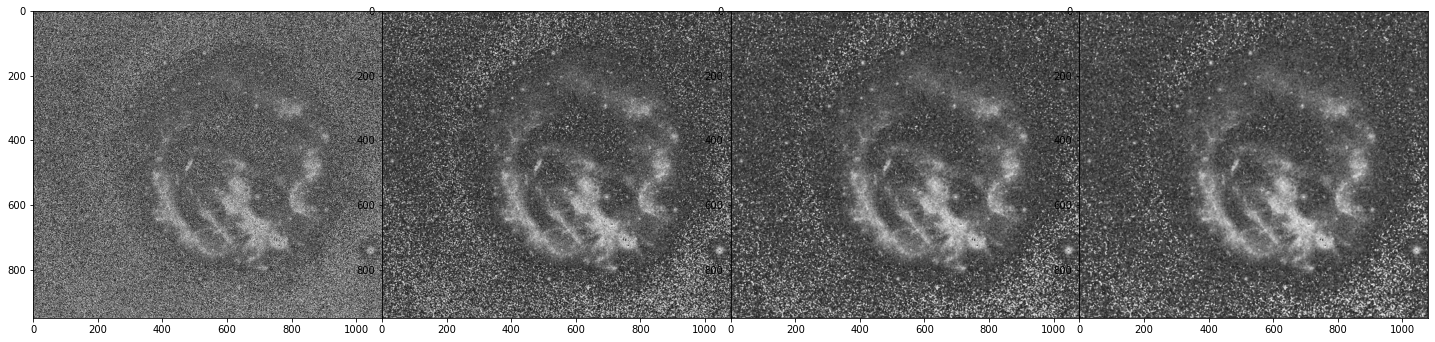

In [ ]:
image = cv2.imread('/content/image-denoising-by-averaging/blowup17.jpg', cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 4, figsize=(25, 50))
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].imshow(image, cmap='gray')
tmp = medfilt(image)
ax[1].imshow(tmp, cmap='gray')
tmp = medfilt(tmp)
ax[2].imshow(tmp, cmap='gray')
tmp = medfilt(tmp)
ax[3].imshow(tmp, cmap='gray')


Медианный фильтр заменяет значение пикселя на значение медианы распределения яркостей всех пикселей в окрестности (включая и исходный)

In [ ]:
def mean_filter(image: ArrayLike, kernel_size: int = 3):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    grad = convolve2d(image, kernel, boundary='symm', mode='same')
    return grad

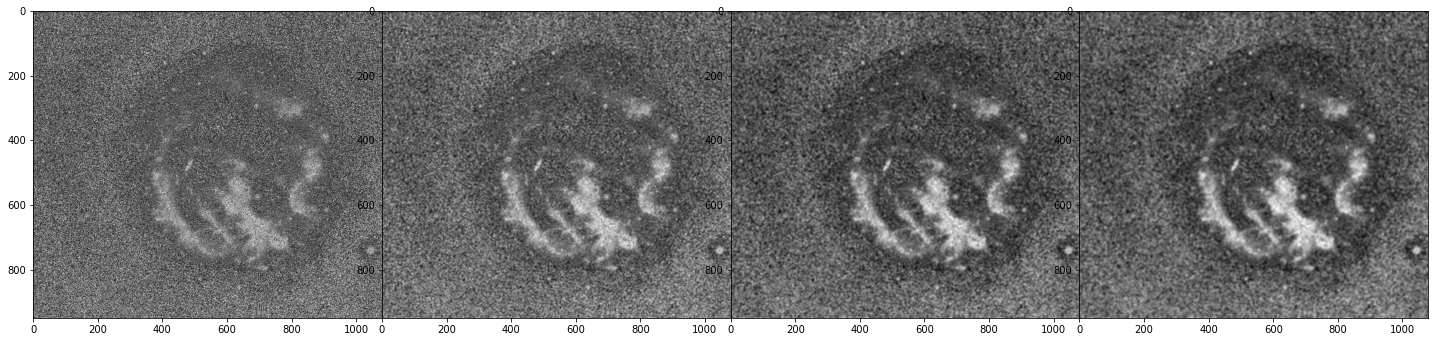

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(25, 25))
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].imshow(image, cmap='gray')
tmp = mean_filter(image, 5)
ax[1].imshow(tmp, cmap='gray')
tmp = mean_filter(tmp, 5)
ax[2].imshow(tmp, cmap='gray')
tmp = mean_filter(tmp, 5)
ax[3].imshow(tmp, cmap='gray')


Сначала берем ядро размера kernel_size, а затем делаем свертку матрицы изображения и полученного ядра. В результате получается новое изображение.Применили сначала оригинальную функцию к исходному изображению, затем нашу функцию, и в результате в первом и втором случае изображение стало более четким

### Пространственные фильтры повышения резкости

Операция повышения резкости направлена на выделение яркостных переходов.

Повышение резкости является операцией обратной к расфокусировке и достигается пространственным дифференцированием.

Однозначные яркостные переходы должны обладать большей "скоростью" изменения яркости, что приводит нас к оценке степени яркостного перехода через производные.

На практике всё-таки чаще оперируют "ускорением" яркости, что приводит ко вторым производным, на плоскости — к оператору Лапласа:

$$
\Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}.
$$

Аппроксимация второго порядка для функции одного переменного:

$$
g''(x) \approx \frac{g(x-h) - 2g(x) + g(x+h)}{h^2}.
$$

Тогда

$$
\begin{aligned}
\frac{\partial^2 f}{\partial x^2} &= f(x-1,y) - 2f(x,y) + f(x+1,y),
\\
\frac{\partial^2 f}{\partial y^2} &= f(x,y-1) - 2f(x,y) + f(x,y+1), 
\end{aligned}
$$

откуда

$$
\Delta f = f(x-1,y) + f(x+1,y) + f(x,y-1) + f(x,y+1) - 4f(x,y).
$$

Таким образом, оператор Лапласа может быть задан маской фильтра

$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}.
$$

Иногда добавляют диагональные элементы в формулу дискретного лапласиана:

$$
\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}.
$$


In [ ]:
!wget -O map.jpg https://upload.wikimedia.org/wikipedia/commons/3/3a/AfricaCIA-HiRes.jpg

--2022-12-05 17:23:55--  https://upload.wikimedia.org/wikipedia/commons/3/3a/AfricaCIA-HiRes.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2109034 (2.0M) [image/jpeg]
Saving to: ‘map.jpg’

map.jpg             100%[===================>]   2.01M  --.-KB/s    in 0.1s    

2022-12-05 17:23:55 (14.5 MB/s) - ‘map.jpg’ saved [2109034/2109034]



In [ ]:
def laplace(image):
  r = cv2.Laplacian(image, cv2.CV_64F, ksize=1)
  cv2.threshold(r, 0, 255, cv2.THRESH_TOZERO)
  return r.astype(np.uint8)

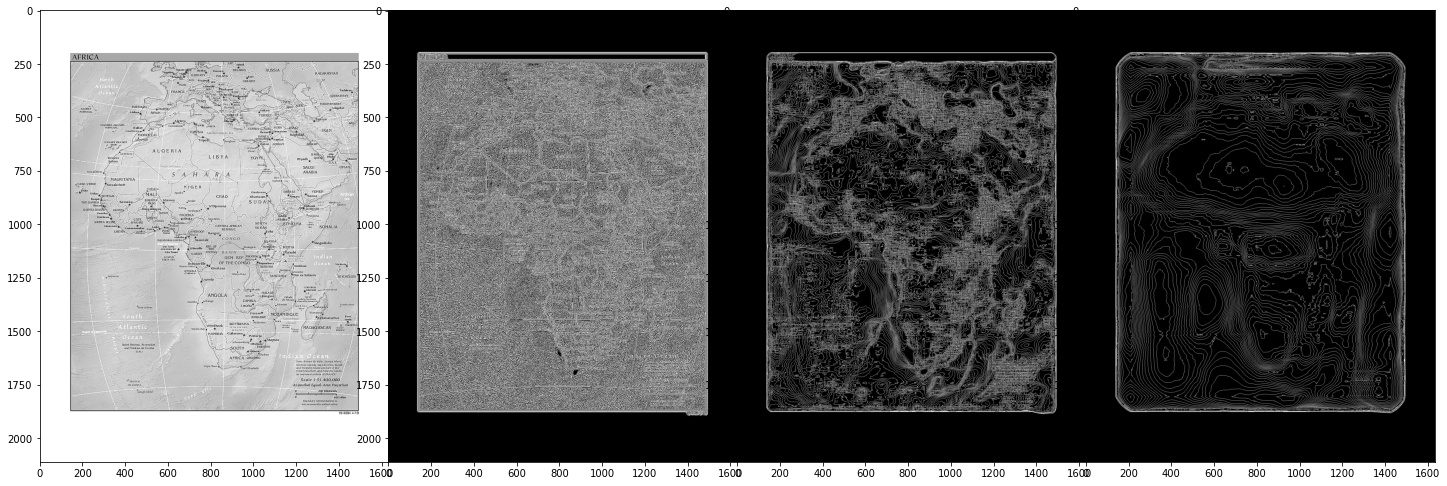

In [ ]:
map = cv2.imread('map.jpg', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 4, figsize=(25, 50))
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].imshow(map, cmap='gray')
ax[1].imshow(laplace(map), cmap='gray')
ax[2].imshow(laplace(cv2.medianBlur(map, 35)), cmap='gray')
ax[3].imshow(laplace(cv2.medianBlur(map, 135)), cmap='gray')

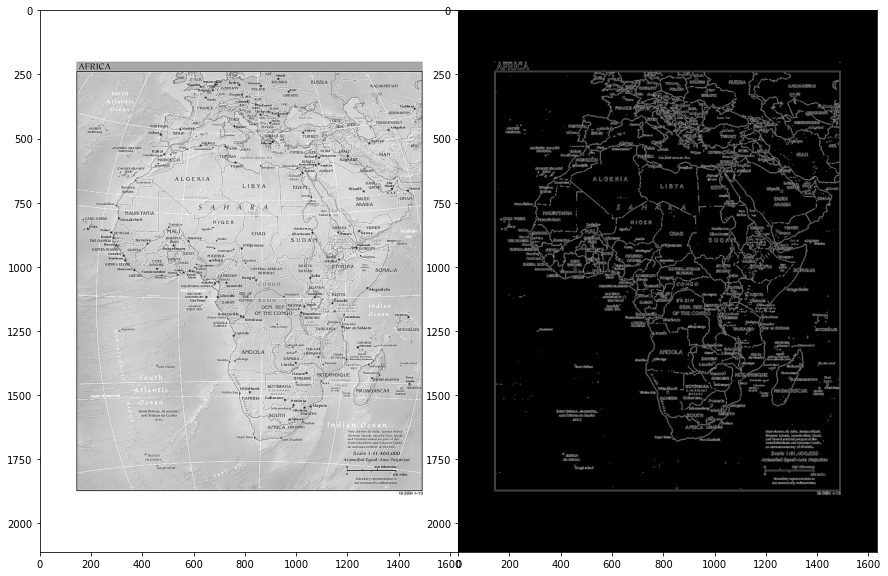

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 30))
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].imshow(map, cmap='gray')
ax[1].imshow(laplace(np.uint8(map > 128)), cmap='gray')

---

#### Задание

**Почему не видны меридианы и параллели?**

Получите изображение похожее на последнее, в котором также выделены параллели и меридианы.

---

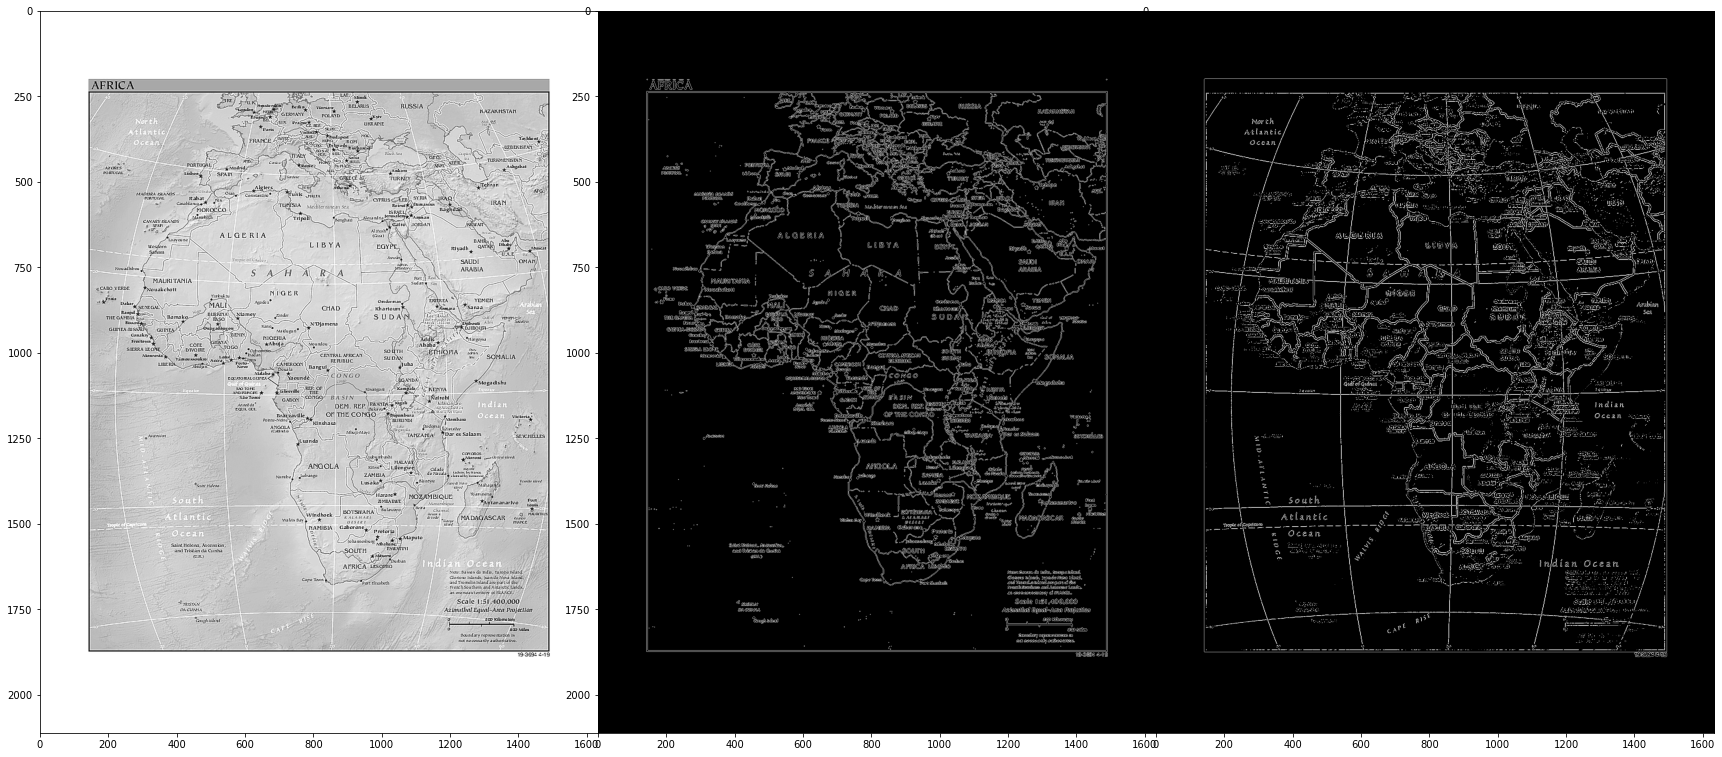

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30, 60))
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].imshow(map, cmap='gray')
ax[1].imshow(laplace(np.uint8(map > 128)), cmap='gray')
ax[2].imshow(laplace(np.uint8(map > 240)), cmap='gray')

Делаем выборку пикселей, цвет которых больше чем 240 (map > 240). Наше изображение черно-белое, следовательно цвет пикселя находится в диапазоне значений от 0 до 255. Мы берем пиксели, цвет которых больше 240 (так лучше всего получается). Если цвет пикселя больше 240, то функция лапласа вернет не ноль, значит цвет этого пикселя сохранится, а если меньше 240, то функция лапласа вернет нам 0. В результате получается, что все медианы, паралели, которые выделены белым, останутся, а все остальное станет черным, что и позволит нам выделить все эти линии.

### Повышение резкости

Алгоритм
использования лапласиана для повышения резкости изображений сводится
к следующему:

$$
g(x, y) = f(x, y) + c \varphi( \Delta f(x, y) ),
$$
где $c$ — некоторая положительная константа, $\varphi$ — некоторая функция.

Если границы на изображении имеют чёрный (или тёмно-серый) цвет, то с помощью лапласиана можно изготовить маску $M(x, y)$. Тогда повышение резкости можно достигнуть поэлементным умножением:

$$
g(x, y) = f(x, y) * M(x, y).
$$

---

#### Задание

Сделайте границу на карте более чёткой. Попробуйте её сделать жирнее.

---

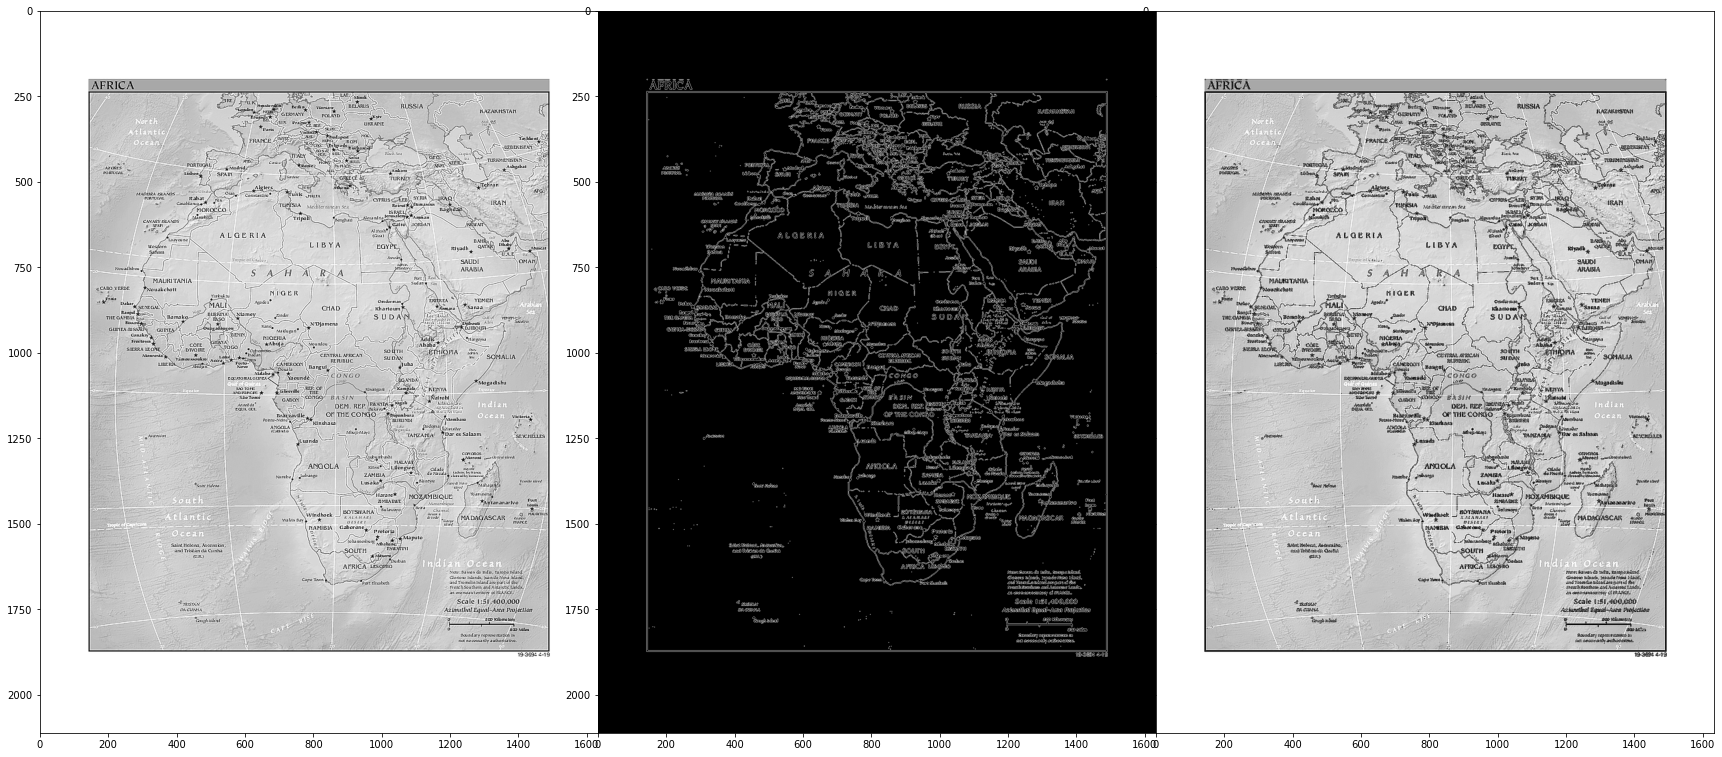

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(30, 60))
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].imshow(map, cmap='gray')
mask = np.uint8(laplace(np.uint8(map > 128)))
ax[1].imshow(laplace(np.uint8(map > 128)), cmap='gray')
ax[2].imshow((map + map * mask), cmap='gray')


Понижаем минимальное значение при выборке пикселей.
Берем выборку map > 128, что позволяет нам взять не только белый цвет, как в прошлом примере, но также и более темные пиксели, которые располагаются вокруг контуров. В результате получается черная карта с жирными контурами, но так как нам нужна изначальная, мы прибавляем эту же карту, чтобы черные пиксели приняли цвет оригинальной карты.

g(x,y)=f(x,y)∗M(x,y) -- поэлементное умножение на маску

## Обработка изображений в частотной области

### Дискретное преобразование Фурье

Двумерное дискретное преобразование Фурье:

$$
F(u,v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y) \exp{
\left[
  -2\pi i (ux/M + vy/N)
\right]},
$$

где $f(x, y)$ — цифровое изображение размера $M \times N$.

Обратное дискретное преобразование Фурье:

$$
f(x,y) = \frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} F(u,v)
\exp{\left[2\pi i (ux/M + vy/N)\right]}.
$$

### Фурье-спектр и фаза

Справедлива формула

$$
F(u,v) = |F(u,v)| \exp{\left[i \varphi(u, v) \right]},
$$

где амплитуда

$$
|F(u,v)| = \left[ \mathrm{Re}^2(F(u,v)) + \mathrm{Im}^2(F(u,v)) \right]^{1/2}
$$

называется *Фурье-спектром* или *частотным спектром* или *магнитудой*, а

$$
\varphi(u,v) = \mathrm{arctg} \frac{\mathrm{Im}(F(u,v))}{\mathrm{Re}(F(u,v))}
$$

называется *фазовым углом* или просто *фазой*.

> Значение $|F(0,0)|$ обычно является самой большой компонентой спектра, на несколько порядков превышая амплитуды остальных составляющих.

> Поскольку в начале координат частотные компоненты $u$ и $v$ равны нулю, $F(0, 0)$ часто называют *постоянной составляющей преобразования* (**dc component**).

> Эта величина определяет среднюю яркость изображения.

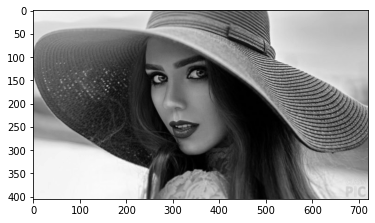

In [ ]:
!wget --quiet -O photo.jpg https://classpic.ru/wp-content/uploads/2017/02/26228/Ryzhaya-devushka-v-krasnoj-shlyape-720x405.jpg

photo = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

if photo is not None:
  plt.imshow(photo, cmap='gray')
else:
  raise RuntimeError('Не удалось загрузить изображение.')

- Фурье-спектр может быть иметь большие значения, поэтому средства визуализации могут его отображать некорректно. В связи с этим используют *логарифмический масштаб*.

- Часто для визуализации ДПФ используют сдвиг, чтобы постоянная составляющая преобразования находилась в центре.

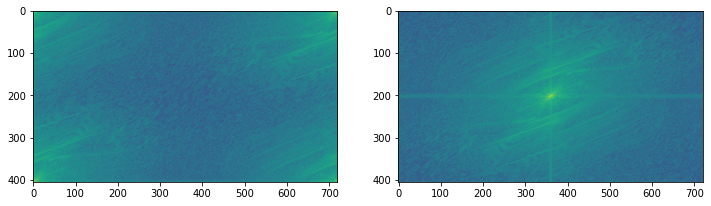

In [ ]:
fft = np.fft.fft2(photo)
fftShift = np.fft.fftshift(fft)

fig, ax = plt.subplots(1, 2, figsize=(12, 10))

ax[0].imshow(np.log(abs(fft)))
ax[1].imshow(np.log(abs(fftShift)))

Изображение, как видно, содержит компоненты всех частот, но их магнитуда становится меньше для высоких частот. Следовательно, низкие частоты содержат больше информации об изображении, чем высокие.

Центрированное изображение показывает, что в исходном изображении присутствуют два доминирующих направления: вертикальное и горизонтальное. Но есть и другие линии, которые, видимо, связаны с узором на исходном изображении.

Фаза тоже содержит характерные горизонтальную и вертикальную линии:

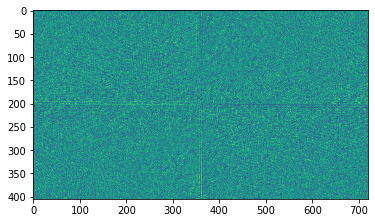

In [ ]:
plt.imshow(np.angle(fftShift))

Восстановим изображение:

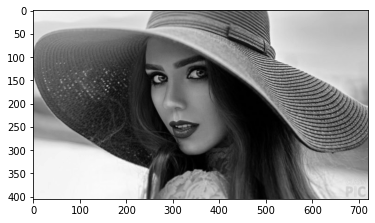

In [ ]:
ifftShift = np.fft.ifftshift(fftShift)
r = abs(np.fft.ifft2(ifftShift))

plt.imshow(r, cmap='gray')

Уберём фазу:

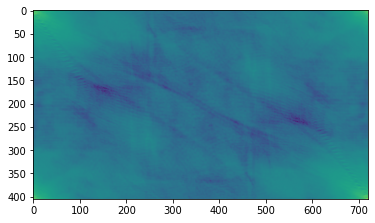

In [ ]:
no_phase = abs(fftShift)

ifftShift = np.fft.ifftshift(no_phase)
r = abs(np.fft.ifft2(ifftShift))

plt.imshow(np.log(r))

> Это показывает, что информация, хранимая в фазе, играет важную роль в восстановлении изображения в пространственном домене.

---

### Задание

Сделайте магнитуду равной всюду $1$ и восстановите изображение. Сделайте выводы.

---

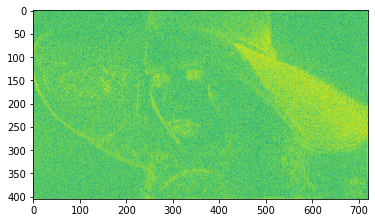

In [ ]:
phase = fftShift / abs(fftShift)

ifftShift = np.fft.ifftshift(phase)
r = abs(np.fft.ifft2(ifftShift))

plt.imshow(np.log(r))

Информация, хранимая в фазе, играет важную роль в восстановлении изображения в пространственном домене. При восстановлении с магнитудой получается непонятно что, а с фазой все как надо

---

### Задание

Создайте изображение того же размера, что и исходное, содержащее на чёрном фоне центрированный белый треугольник.

Восстановите изображение из магнитуды прямоугольника и фазы исходного изображения.

---

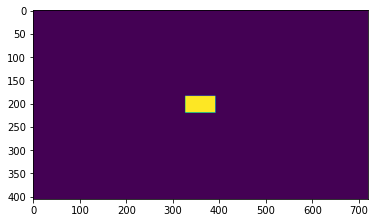

In [ ]:
import math

rect = np.zeros_like(photo)
rect[math.floor(rect.shape[0]*5/11): math.floor(rect.shape[0] * 6/11), math.floor(rect.shape[1]*5/11): math.floor(rect.shape[1] * 6/11)] = 255

plt.imshow(rect)

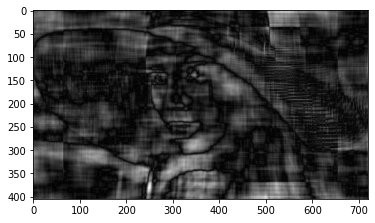

In [ ]:
fftr = np.fft.fft2(rect)
fftrShift = np.fft.fftshift(fftr)
phase = np.angle(fftShift)
ifftpShift = np.fft.ifftshift(np.exp(phase * 1j) * abs(fftrShift))
r = abs(np.fft.ifft2(ifftpShift))

plt.imshow(r, cmap='gray')

Посчитал магнитуду и фазу, подставил в формулу $$
F(u,v) = |F(u,v)| \exp{\left[i \varphi(u, v) \right]},
$$получился вот такой результат.

### Фильтрация в частотной области

Взаимосвязи частотных составляющих Фурье-образа и пространственных характеристик:

- Частоты Фурье-преобразования связаны с вариацией яркости на изображении:
    - Низкие частоты соответствуют медленно меняющимся компонентам изображения, например плавным изменениям яркости.
    - По мере удаления от начала координат более высокие частоты начинают соответствовать все более и более быстрым изменениям яркости (которые суть границы объектов или другие детали изображения, характеризуемые резкими изменениями яркости). Высокие частоты — обычно контуры и шум.

Фильтрация в частотной области заключается в модифицировании Фурье-образа изображения и последующем выполнении обратного преобразования
для получения обработанного результат:

$$
g(x, y) = \mathscr{F}^{-1}[H(u,v)F(u,v)],
$$

где $H(u, v)$ *фильтр-функция*, называемая просто *фильтром* или *передаточной функцией фильтра*.

*Фильтры низких частот*, подавляющие высокие частоты и пропускающие низкие, будут размывать изображение.

*Фильтры высоких частот* работаю наоборот.

---

### Задание

Используйте центрированный прямоугольник как маску для выделения низких частот и отбрасывания остальных.

Восстановите изображение с помощью этой маски и известного центрированного ДПФ. 
Рассмотрите прямоугольники разных размеров.

---

In [ ]:
rect1 = np.zeros_like(photo)
rect1[math.floor(rect.shape[0]*5/11): math.floor(rect.shape[0] * 6/11), math.floor(rect.shape[1]*5/11): math.floor(rect.shape[1] * 6/11)] = 255

rect2 = np.zeros_like(photo)
rect2[math.floor(rect.shape[0]/4): math.floor(rect.shape[0] * 3/4), math.floor(rect.shape[1]/4): math.floor(rect.shape[1] * 3/4)] = 255

rect3 = np.zeros_like(photo)
rect3[math.floor(rect.shape[0]/5): math.floor(rect.shape[0] * 4/5), math.floor(rect.shape[1]/5): math.floor(rect.shape[1] * 4/5)] = 255

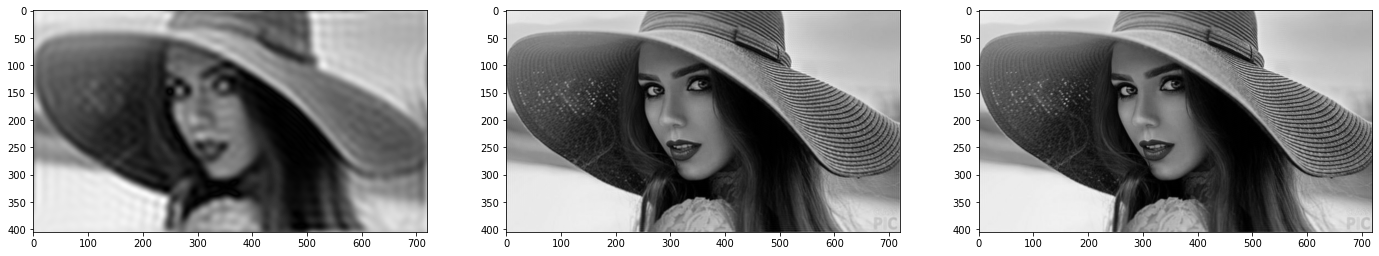

In [ ]:
ifftr1Shift = np.fft.ifftshift(rect1 * fftShift)
ifftr2Shift = np.fft.ifftshift(rect2 * fftShift)
ifftr3Shift = np.fft.ifftshift(rect3 * fftShift)
r1 = abs(np.fft.ifft2(ifftr1Shift))
r2 = abs(np.fft.ifft2(ifftr2Shift))
r3 = abs(np.fft.ifft2(ifftr3Shift))

fig, ax = plt.subplots(1, 3, figsize=(24, 12))

ax[0].imshow(r1, cmap='gray')
ax[1].imshow(r2, cmap='gray')
ax[2].imshow(r3, cmap='gray')

Использовал прямоугольники разных размеров, в результате это сказывалось на изображении после обработки. Этот фильтр отвечает за размытие (фильтр низких частот)

---

### Задание

Используйте инверсию центрированного прямоугольника в качестве маски.

Восстановите изображение с помощью этой маски и известного центрированного ДПФ.
Рассмотрите прямоугольники разных размеров.

---

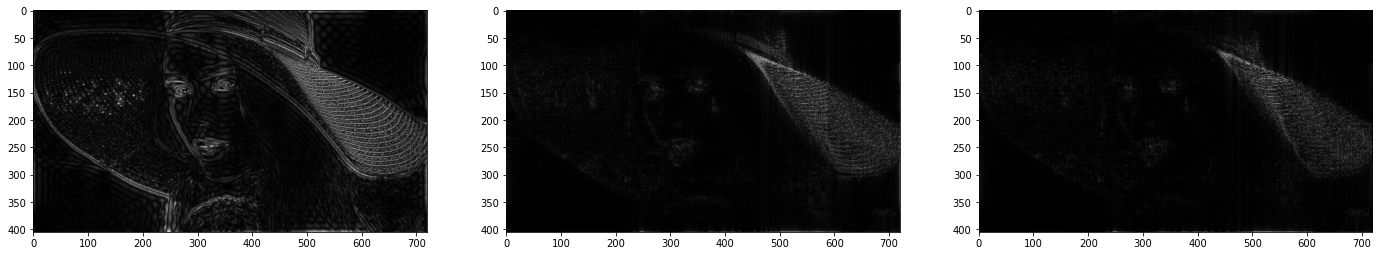

In [ ]:
ifftr1Shift = np.fft.ifftshift(abs(np.ones_like(rect1) * 255 - rect1) * fftShift)
ifftr2Shift = np.fft.ifftshift(abs(np.ones_like(rect2) * 255 - rect2) * fftShift)
ifftr3Shift = np.fft.ifftshift(abs(np.ones_like(rect3) * 255 - rect3) * fftShift)
r1 = abs(np.fft.ifft2(ifftr1Shift))
r2 = abs(np.fft.ifft2(ifftr2Shift))
r3 = abs(np.fft.ifft2(ifftr3Shift))

fig, ax = plt.subplots(1, 3, figsize=(24, 12))

ax[0].imshow(r1, cmap='gray')
ax[1].imshow(r2, cmap='gray')
ax[2].imshow(r3, cmap='gray')

Проделали все тоже самое что и в предыдущем задании, но с инверсированным изображением и уже получился фильтр высоких частот. Этот фильтр отвечает за контур и шум (подавляет низкие частоты и пропускает высокие)